In [ ]:
#Levy Thiga Kariuki
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
data = pd.read_csv("used_car_sales.csv")


In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
       ID  pricesold  yearsold  Mileage               Make  \
0  137178       7500      2020    84430               Ford   
1   96705      15000      2019        0  Replica/Kit Makes   
2  119660       8750      2020    55000             Jaguar   
3   80773      11600      2019    97200               Ford   
4   64287      44000      2019    40703            Porsche   

                Model  Year           Trim                   Engine  \
0             Mustang  1988             LX              5.0L Gas V8   
1  Jaguar Beck Lister  1958            NaN        383 Fuel injected   
2                 XJS  1995  2+2 Cabriolet  4.0L In-Line 6 Cylinder   
3             Mustang  1968          Stock           289 cu. in. V8   
4                 911  2002     Turbo X-50                     3.6L   

      BodyType  NumCylinders DriveType  
0        Sedan             0       RWD  
1  Convertible             8       RWD  
2  Convertible             6       RWD  
3    

In [ ]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
ID                  0
pricesold           0
yearsold            0
Mileage             0
Make                0
Model             573
Year                0
Trim            48924
Engine          27098
BodyType        20786
NumCylinders        0
DriveType       24851
dtype: int64


In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
# Summary statistics
print("\nSummary statistics of numerical columns:")
print(data.describe())


Summary statistics of numerical columns:
                  ID      pricesold      yearsold       Mileage          Year  \
count   60541.000000   60541.000000  60541.000000  6.054100e+04  6.054100e+04   
mean    84622.032094   11341.102559   2019.370592  5.682391e+05  3.324117e+03   
std     47499.723830   13970.623855      0.501985  2.007521e+07  1.630572e+05   
min         1.000000       0.000000   2018.000000  0.000000e+00  0.000000e+00   
25%     44176.000000    3100.000000   2019.000000  4.604300e+04  1.991000e+03   
50%     85370.000000    7000.000000   2019.000000  9.263200e+04  2.004000e+03   
75%    124911.000000   15000.000000   2020.000000  1.440000e+05  2.011000e+03   
max    165799.000000  404990.000000   2020.000000  1.234568e+09  2.014000e+07   

       NumCylinders  
count  6.054100e+04  
mean   3.547691e+04  
std    8.727806e+06  
min    0.000000e+00  
25%    4.000000e+00  
50%    6.000000e+00  
75%    8.000000e+00  
max    2.147484e+09  


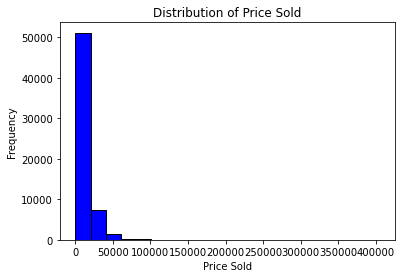

In [ ]:
# Visualize the distribution of 'pricesold' using a histogram
import matplotlib.pyplot as plt
plt.hist(data['pricesold'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Price Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Price Sold')
plt.show()

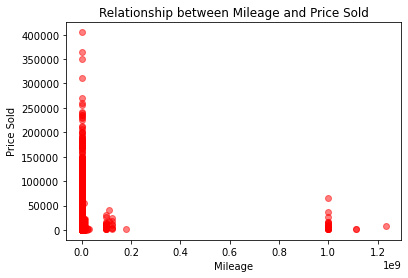

In [ ]:
# Visualize the relationship between 'pricesold' and 'Mileage' using a scatter plot
plt.scatter(data['Mileage'], data['pricesold'], color='red', alpha=0.5)
plt.xlabel('Mileage')
plt.ylabel('Price Sold')
plt.title('Relationship between Mileage and Price Sold')
plt.show()

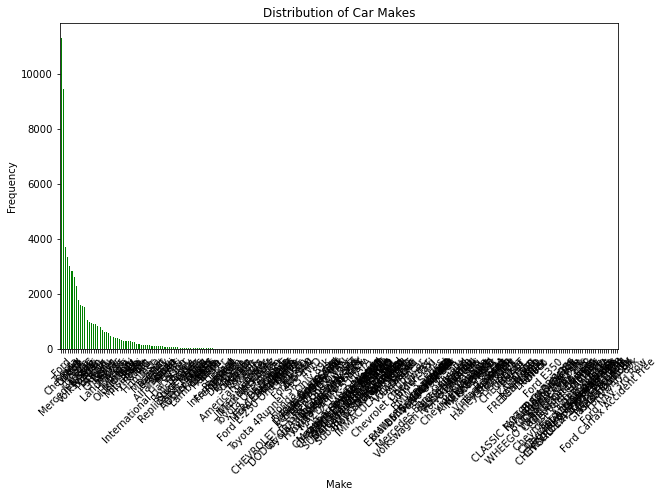

In [ ]:
# Visualize the distribution of 'Make' using a bar plot
plt.figure(figsize=(10, 6))
data['Make'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.title('Distribution of Car Makes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# Load the dataset
data = pd.read_csv("used_car_sales.csv")

In [ ]:
# Data Preprocessing
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Make', 'Model', 'Trim', 'BodyType', 'DriveType'])

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # Import the stats module for z-score calculation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Handling outliers using z-score method
z_scores = np.abs(stats.zscore(data[['pricesold', 'Mileage']]))
data = data[(z_scores < 3).all(axis=1)]

In [ ]:
# Feature Engineering
# Calculate the age of the car
data['Age'] = data['yearsold'] - data['Year']

In [ ]:
# Derive additional features
data['Price_per_Mile'] = data['pricesold'] / data['Mileage']
data['Price_Depreciation_Rate'] = (data['Year'] - data['yearsold']) / data['pricesold']

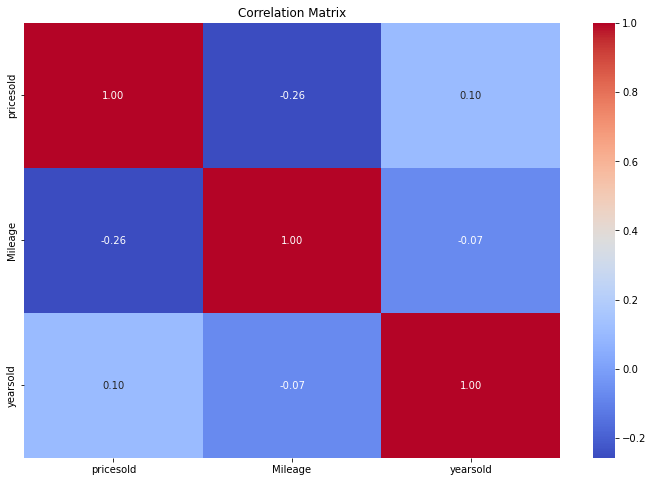

In [ ]:
# Select relevant features for correlation analysis
selected_features = ['pricesold', 'Mileage', 'yearsold']  # Add more features as needed

# Sample a subset of the dataset
sample_data = data[selected_features].sample(n=100, random_state=42)  # Adjust sample size as needed

# Advanced Visualizations
# Correlation analysis
corr_matrix = sample_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Convert numeric columns to float32
numeric_cols = ['pricesold', 'yearsold', 'Mileage']
data[numeric_cols] = data[numeric_cols].astype('float32')

# Perform feature selection
selected_features = ['yearsold', 'Mileage']
X = data[selected_features]
y = data['pricesold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))


Mean Squared Error: 95710490.0


In [ ]:
# Clustering
# Perform K-means clustering on numerical features
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Mileage', 'Age']])

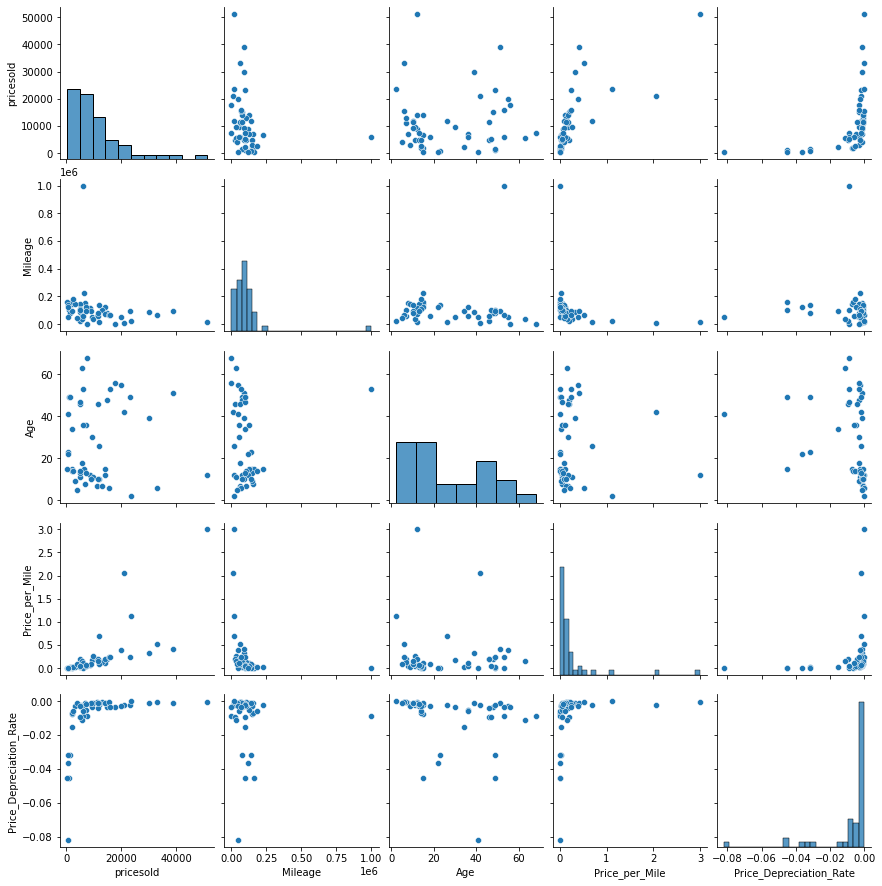

In [ ]:
# Sample a subset of the data
sample_data = data.sample(n=50, random_state=42)  # Adjust the sample size as needed

# Select relevant columns for pair plots
pair_plot_cols = ['pricesold', 'Mileage', 'Age', 'Price_per_Mile', 'Price_Depreciation_Rate']

# Generate pair plots
sns.pairplot(sample_data[pair_plot_cols])
plt.show()

In [ ]:
print(sample_data.columns)

Index(['ID', 'pricesold', 'yearsold', 'Mileage', 'Year', 'Engine',
       'NumCylinders', 'Make_1964 International', 'Make_2101', 'Make_300',
       ...
       'DriveType_v8 auto', 'DriveType_van', 'DriveType_x-Drive',
       'DriveType_xDrive28i Sports Activity Vehicle',
       'DriveType_xDrive30i Sports Activity Vehicle',
       'DriveType_xDrive50i Sports Activity Vehicle', 'Age', 'Price_per_Mile',
       'Price_Depreciation_Rate', 'Cluster'],
      dtype='object', length=34864)


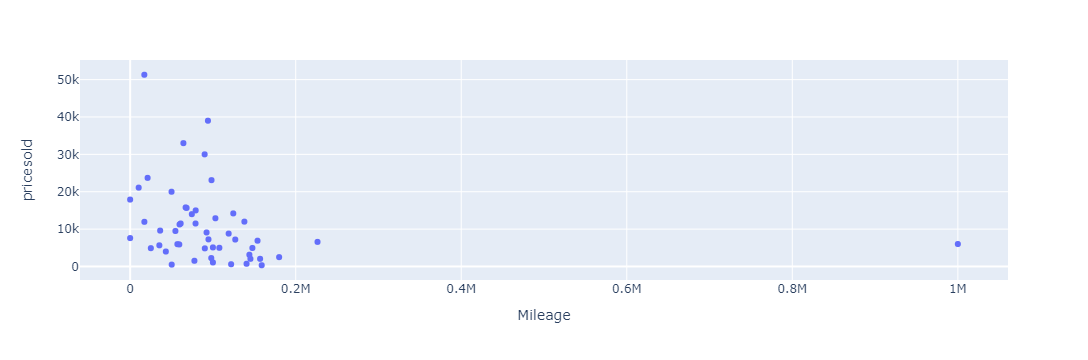

In [ ]:
# Extract the columns related to 'Make'
make_columns = [col for col in sample_data.columns if col.startswith('Make_')]

# Combine the one-hot encoded columns into a single 'Make' column
sample_data['Make'] = sample_data[make_columns].apply(lambda row: row.idxmax().split('_')[-1], axis=1)

# Now can use 'Make' as hover data in the scatter plot
fig = px.scatter(sample_data, x='Mileage', y='pricesold', hover_data=['Make'])
fig.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define the pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Assuming X_train, X_test, y_train, y_test are already defined

# Define preprocessing steps for numerical features
numeric_features = [0, 1, 2, 3]  # Assuming the first 4 columns are numeric
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
# Combine preprocessing steps for all features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [ ]:
# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', RandomForestRegressor())])

In [ ]:
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [ ]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 71390930.51099999


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Compute the mean cross-validation score
mean_cv_score = np.mean(cv_scores)

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset
data = pd.read_csv("used_car_sales.csv")

In [ ]:
# Sample 800 rows from the dataset
data = data.sample(n=800, random_state=42)

In [ ]:
# Separate features (X) and target (y)
X = data.drop(columns=['pricesold'])
y = data['pricesold']

In [ ]:
# Define numerical and categorical features
numeric_features = ['Year', 'Mileage', 'NumCylinders']
categorical_features = ['Make', 'Model', 'Trim', 'BodyType', 'DriveType']

In [ ]:
# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
# Append classifier to preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(data.columns)

Index(['ID', 'pricesold', 'yearsold', 'Mileage', 'Make', 'Model', 'Year',
       'Trim', 'Engine', 'BodyType', 'NumCylinders', 'DriveType'],
      dtype='object')


In [ ]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Mileage',
                                                   'NumCylinders']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                        

In [ ]:
# Predict on the test data
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.00625


In [ ]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
df = pd.read_csv('used_car_sales.csv')

In [ ]:
# Data Preprocessing
# Select only numeric columns
numeric_columns = df.select_dtypes(include='number')
# Handle missing values by filling with mean
numeric_columns.fillna(numeric_columns.mean(), inplace=True)

In [ ]:
# Print column names before preprocessing
print("Column names before preprocessing:")
print(df.columns)

Column names before preprocessing:
Index(['ID', 'pricesold', 'yearsold', 'Mileage', 'Trim', 'Engine', 'BodyType',
       'NumCylinders', 'DriveType', 'Make_BMW', 'Make_Cadillac',
       'Make_Chevrolet', 'Make_Dodge', 'Make_Ford', 'Make_Honda', 'Make_Jeep',
       'Make_Mercedes-Benz', 'Make_Other', 'Make_Toyota', 'Make_Volkswagen',
       'Model_3-Series', 'Model_C-10', 'Model_Camaro', 'Model_Corvette',
       'Model_F-150', 'Model_F-250', 'Model_Mustang', 'Model_Other',
       'Model_Other Pickups', 'Model_Wrangler', 'Year_2001', 'Year_2002',
       'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007',
       'Year_2008', 'Year_2011', 'Year_2013', 'Year_Other'],
      dtype='object')


In [ ]:
# Perform preprocessing steps

# Print column names after preprocessing
print("\nColumn names after preprocessing:")
print(df.columns)


Column names after preprocessing:
Index(['ID', 'pricesold', 'yearsold', 'Mileage', 'Trim', 'Engine', 'BodyType',
       'NumCylinders', 'DriveType', 'Make_BMW', 'Make_Cadillac',
       'Make_Chevrolet', 'Make_Dodge', 'Make_Ford', 'Make_Honda', 'Make_Jeep',
       'Make_Mercedes-Benz', 'Make_Other', 'Make_Toyota', 'Make_Volkswagen',
       'Model_3-Series', 'Model_C-10', 'Model_Camaro', 'Model_Corvette',
       'Model_F-150', 'Model_F-250', 'Model_Mustang', 'Model_Other',
       'Model_Other Pickups', 'Model_Wrangler', 'Year_2001', 'Year_2002',
       'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007',
       'Year_2008', 'Year_2011', 'Year_2013', 'Year_Other'],
      dtype='object')


In [ ]:
# Inspect the DataFrame to see if 'Make' column is present
print("\nDataFrame head:")
print(df.head())


DataFrame head:
       ID  pricesold  yearsold  Mileage           Trim  \
0  137178       7500      2020    84430             LX   
1   96705      15000      2019        0            NaN   
2  119660       8750      2020    55000  2+2 Cabriolet   
3   80773      11600      2019    97200          Stock   
4   64287      44000      2019    40703     Turbo X-50   

                    Engine     BodyType  NumCylinders DriveType  Make_BMW  \
0              5.0L Gas V8        Sedan             0       RWD         0   
1        383 Fuel injected  Convertible             8       RWD         0   
2  4.0L In-Line 6 Cylinder  Convertible             6       RWD         0   
3           289 cu. in. V8        Coupe             8       RWD         0   
4                     3.6L        Coupe             6       AWD         0   

   ...  Year_2002  Year_2003  Year_2004  Year_2005  Year_2006  Year_2007  \
0  ...          0          0          0          0          0          0   
1  ...          0  

In [ ]:
pip install category_encoders

In [ ]:
import category_encoders as ce

# Initialize target encoder
target_encoder = ce.TargetEncoder(cols=['Mileage', 'yearsold', 'NumCylinders'])

# Fit and transform the data
df_encoded = target_encoder.fit_transform(df, y)

# Display the encoded DataFrame
print(df_encoded.head())

       ID  pricesold      yearsold       Mileage           Trim  \
0  137178       7500  11536.359365  10378.088928             LX   
1   96705      15000  10351.768620  10630.246872            NaN   
2  119660       8750  11536.359365  13518.882842  2+2 Cabriolet   
3   80773      11600  10351.768620  10635.866150          Stock   
4   64287      44000  10351.768620  15127.048242     Turbo X-50   

                    Engine     BodyType  NumCylinders DriveType  Make_BMW  \
0              5.0L Gas V8        Sedan  10947.909343       RWD         0   
1        383 Fuel injected  Convertible  12874.768436       RWD         0   
2  4.0L In-Line 6 Cylinder  Convertible   9773.359099       RWD         0   
3           289 cu. in. V8        Coupe  12874.768436       RWD         0   
4                     3.6L        Coupe   9773.359099       AWD         0   

   ...  Year_2002  Year_2003  Year_2004  Year_2005  Year_2006  Year_2007  \
0  ...          0          0          0          0        

In [ ]:
# Split features and target variable
X = df.drop(columns=['pricesold'])
y = df['pricesold']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Engine' feature
df['Engine'] = label_encoder.fit_transform(df['Engine'])

In [ ]:
print(df.dtypes)

ID                      int64
pricesold               int64
yearsold                int64
Mileage                 int64
Trim                   object
Engine                  int32
BodyType               object
NumCylinders            int64
DriveType              object
Make_BMW                uint8
Make_Cadillac           uint8
Make_Chevrolet          uint8
Make_Dodge              uint8
Make_Ford               uint8
Make_Honda              uint8
Make_Jeep               uint8
Make_Mercedes-Benz      uint8
Make_Other              uint8
Make_Toyota             uint8
Make_Volkswagen         uint8
Model_3-Series          uint8
Model_C-10              uint8
Model_Camaro            uint8
Model_Corvette          uint8
Model_F-150             uint8
Model_F-250             uint8
Model_Mustang           uint8
Model_Other             uint8
Model_Other Pickups     uint8
Model_Wrangler          uint8
Year_2001               uint8
Year_2002               uint8
Year_2003               uint8
Year_2004 

In [ ]:
# Drop non-numeric columns
df_numeric = df.drop(columns=['Trim', 'BodyType'])

In [ ]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['Trim', 'BodyType', 'DriveType'], dtype='object')


In [ ]:
for col in non_numeric_columns:
    print(col, df[col].unique())

Trim ['LX' nan '2+2 Cabriolet' ... 'CT6 3.0 Twin Turbo Luxury Sedan 4D'
 '7.3L Diesel  4x4 1owner Lariat' 'Custom Sport Special']
BodyType ['Sedan' 'Convertible' 'Coupe' ... 'Rugged' 'Mid-Size' 'Travelall']
DriveType ['RWD' 'AWD' nan ... '4dr Sdn R' '2 Door Sedan'
 '4WD-3.73 Limited Slip Axle']


In [ ]:
# Get the original non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Create a new DataFrame with only the non-numeric columns
non_numeric_df = df[non_numeric_columns]

# Concatenate the non-numeric DataFrame with the encoded DataFrame
df_encoded_with_original_columns = pd.concat([df_encoded, non_numeric_df], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Define the chunk size
chunk_size = 100

# Initialize StandardScaler
scaler = StandardScaler()

# Define the columns to drop
columns_to_drop = ['Make', 'Model', 'Trim', 'Engine', 'BodyType', 'DriveType']

# Define the column transformer excluding the non-numeric columns
column_transformer = ColumnTransformer(
    transformers=[],
    remainder='passthrough'
)

# Define the pipeline with scaling only
pipeline = Pipeline([
    ('scaler', scaler)
])

# Loop through the dataframe in chunks
for chunk in pd.read_csv('used_car_sales.csv', chunksize=chunk_size):
    # Drop non-numeric columns
    chunk_numeric = chunk.drop(columns=columns_to_drop)

    try:
        # Apply StandardScaler to the numeric chunk
        X_scaled_chunk = pipeline.fit_transform(chunk_numeric)

        # Perform your further operations here with the scaled chunk
    except ValueError as ve:
        print("Error occurred while processing chunk. Details:", ve)

In [ ]:
print(df.columns)

Index(['ID', 'pricesold', 'yearsold', 'Mileage', 'Trim', 'Engine', 'BodyType',
       'NumCylinders', 'DriveType', 'Make_BMW', 'Make_Cadillac',
       'Make_Chevrolet', 'Make_Dodge', 'Make_Ford', 'Make_Honda', 'Make_Jeep',
       'Make_Mercedes-Benz', 'Make_Other', 'Make_Toyota', 'Make_Volkswagen',
       'Model_3-Series', 'Model_C-10', 'Model_Camaro', 'Model_Corvette',
       'Model_F-150', 'Model_F-250', 'Model_Mustang', 'Model_Other',
       'Model_Other Pickups', 'Model_Wrangler', 'Year_2001', 'Year_2002',
       'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007',
       'Year_2008', 'Year_2011', 'Year_2013', 'Year_Other'],
      dtype='object')


<AxesSubplot:xlabel='Mileage', ylabel='Count'>

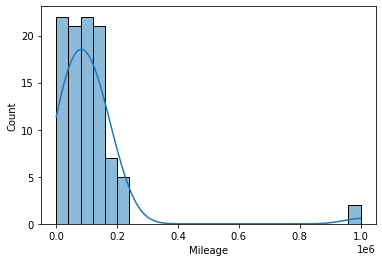

In [ ]:
df_sample = df.sample(n=100, random_state=42)  # Adjust the sample size as needed
sns.histplot(data=df_sample, x='Mileage', kde=True)

In [ ]:
# Data Preprocessing and Statistical Measures
# Handle missing values
missing_values = df.isnull().sum()

In [ ]:
# Compute mean, standard deviation, and variance
numerical_stats = df.describe().loc[['mean', 'std', 'min', 'max', '25%', '50%', '75%']]

In [ ]:
# Display missing values and numerical statistics
print("Missing Values:")
print(missing_values)
print("\nNumerical Statistics:")
print(numerical_stats)

Missing Values:
ID                         0
pricesold                  0
yearsold                   0
Mileage                    0
Trim                   48924
Engine                     0
BodyType               20786
NumCylinders               0
DriveType              24851
Make_BMW                   0
Make_Cadillac              0
Make_Chevrolet             0
Make_Dodge                 0
Make_Ford                  0
Make_Honda                 0
Make_Jeep                  0
Make_Mercedes-Benz         0
Make_Other                 0
Make_Toyota                0
Make_Volkswagen            0
Model_3-Series             0
Model_C-10                 0
Model_Camaro               0
Model_Corvette             0
Model_F-150                0
Model_F-250                0
Model_Mustang              0
Model_Other                0
Model_Other Pickups        0
Model_Wrangler             0
Year_2001                  0
Year_2002                  0
Year_2003                  0
Year_2004                  

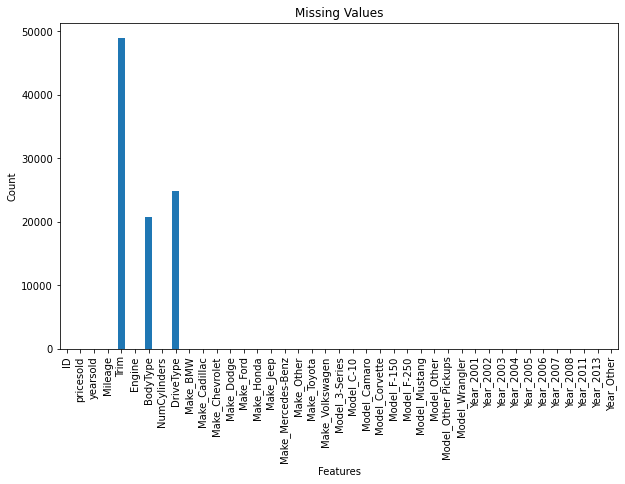

In [ ]:
# Visualize missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

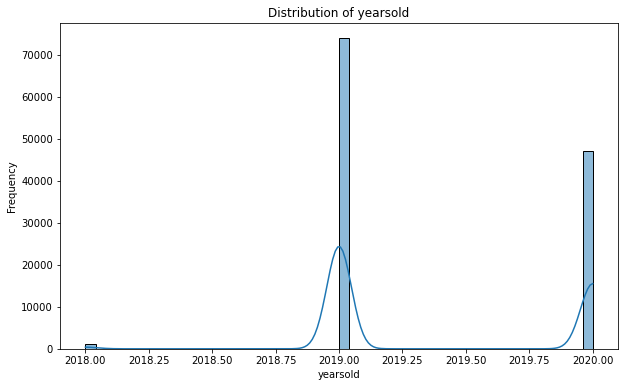

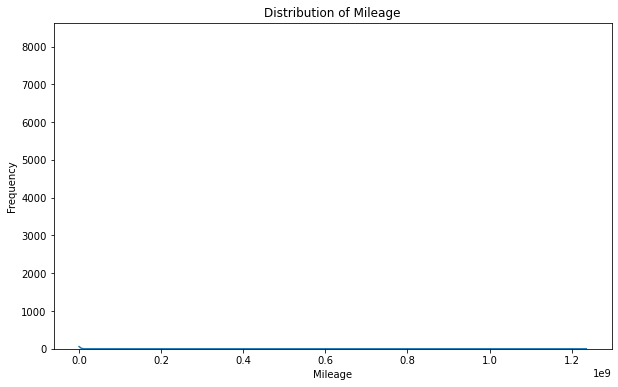

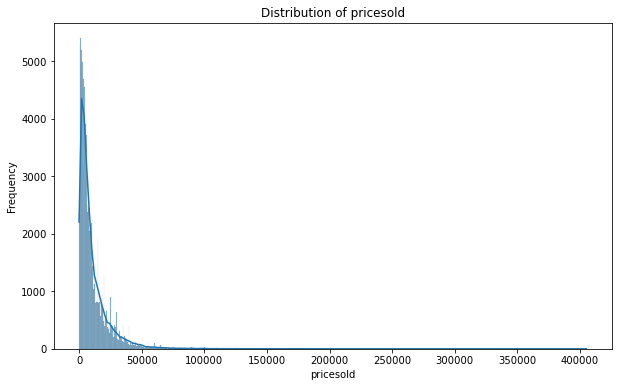

In [ ]:
# Exploratory Data Analysis (EDA)
# Distributions of numerical features
numerical_features = ['yearsold', 'Mileage', 'pricesold']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

<Figure size 720x432 with 0 Axes>

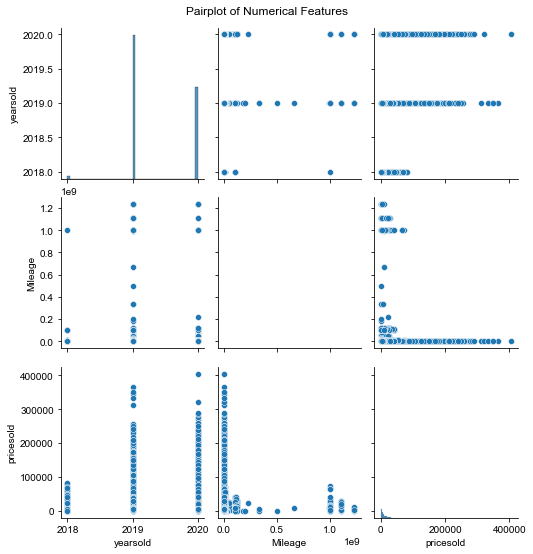

In [ ]:
# Relationships between features
plt.figure(figsize=(10, 6))
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

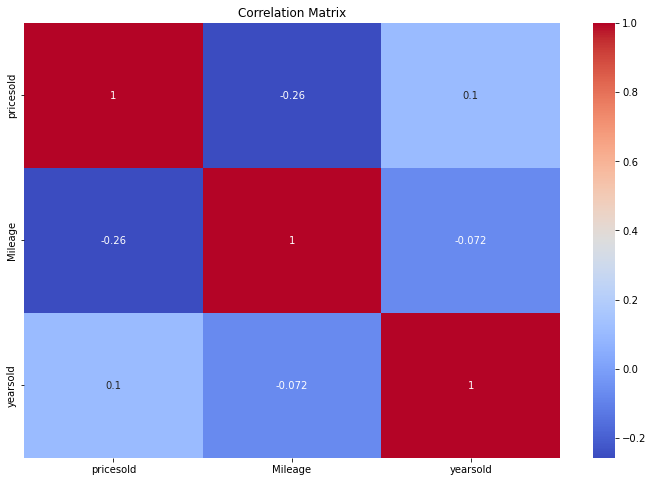

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

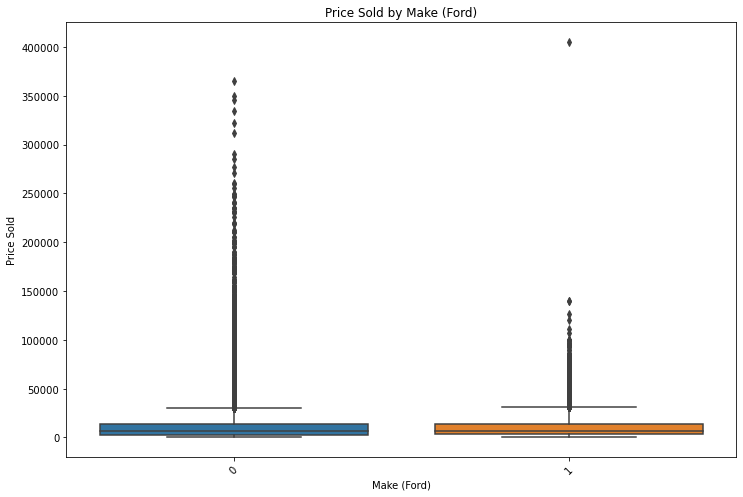

In [ ]:
#pricing of used Ford cars
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Make_Ford', y='pricesold')
plt.title('Price Sold by Make (Ford)')
plt.xlabel('Make (Ford)')
plt.ylabel('Price Sold')
plt.xticks(rotation=45)
plt.show()

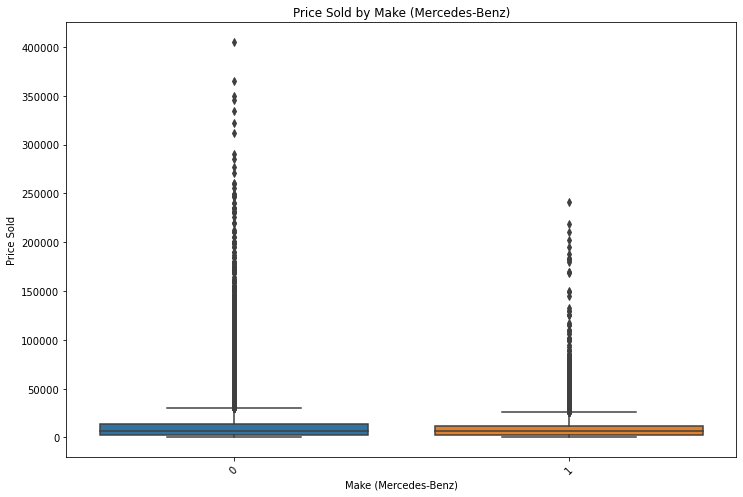

In [ ]:
#pricing of used Mercedes-Benz cars
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Make_Mercedes-Benz', y='pricesold')
plt.title('Price Sold by Make (Mercedes-Benz)')
plt.xlabel('Make (Mercedes-Benz)')
plt.ylabel('Price Sold')
plt.xticks(rotation=45)
plt.show()

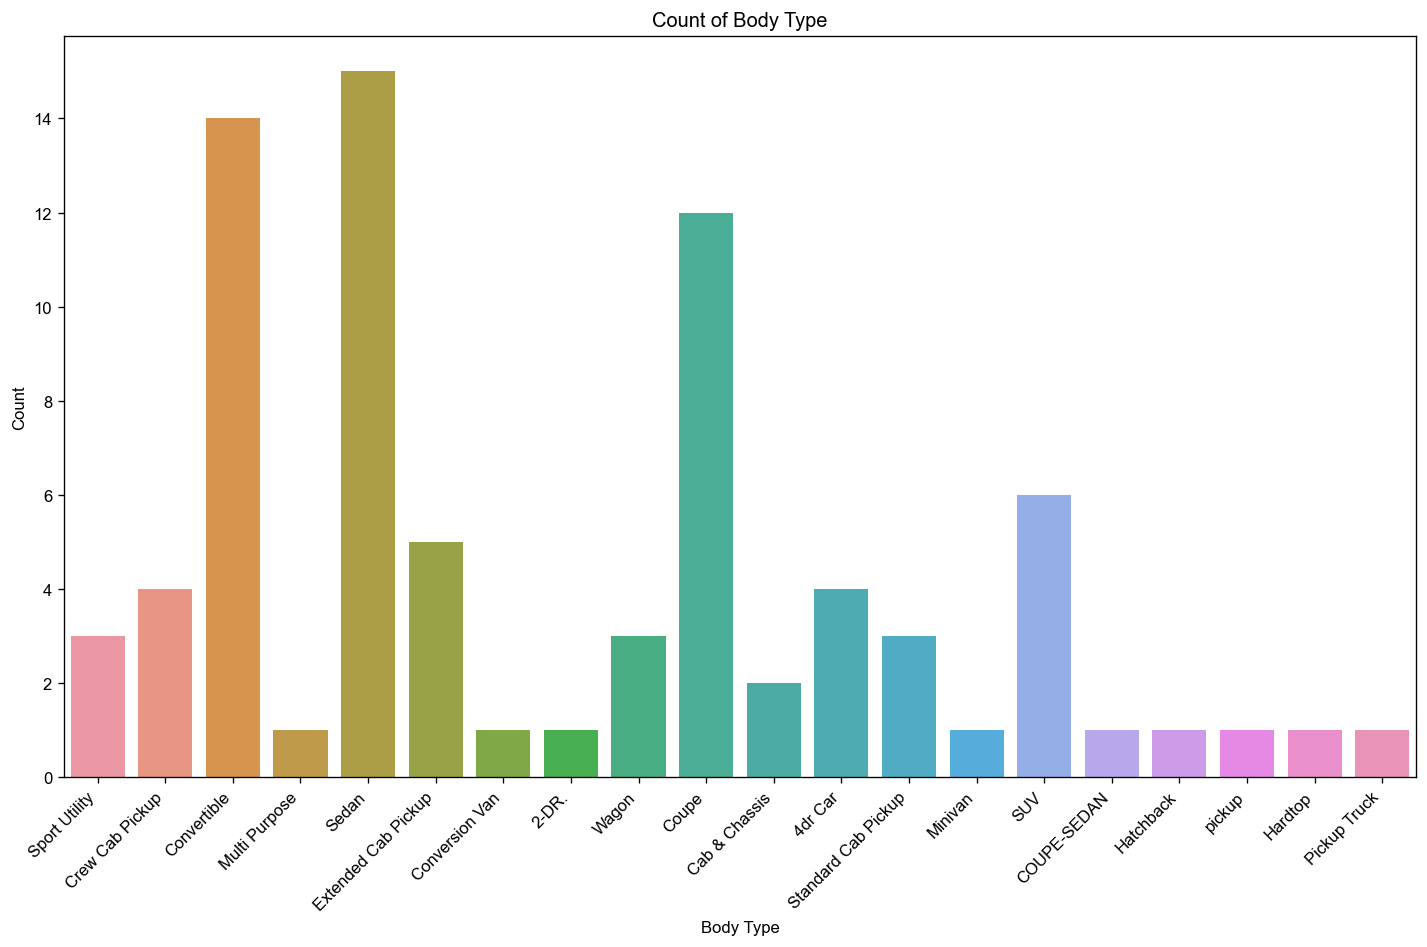

In [ ]:
import matplotlib.pyplot as plt

# Setting the font family to one that supports a wide range of Unicode characters
plt.rcParams['font.family'] = 'Arial'

# Set the DPI for the figure
plt.figure(figsize=(12, 8), dpi=120)  # Adjust DPI as needed

# Take a smaller sample of the data
df_sample = df.sample(n=100, random_state=42)  # Adjust the sample size as needed
#100 is used due to memory constraints

# Create the count plot with the smaller sample
ax = sns.countplot(data=df_sample, x='BodyType')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set plot title and labels
plt.title('Count of Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

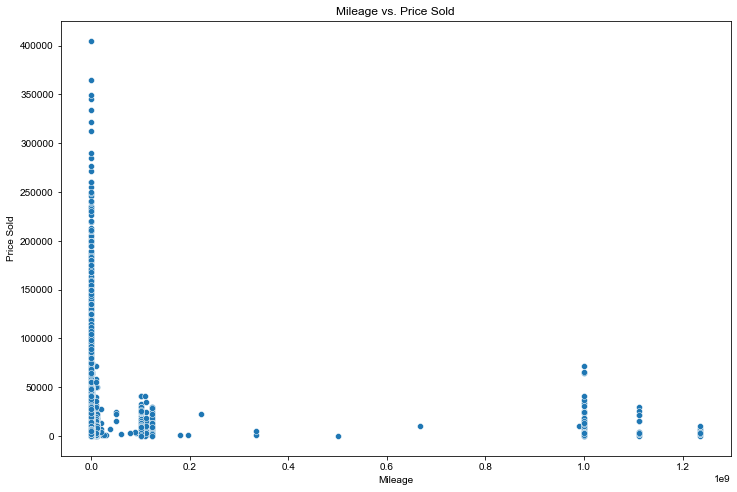

In [ ]:
#Relationship between Price sold at and Mileage
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Mileage', y='pricesold')
plt.title('Mileage vs. Price Sold')
plt.xlabel('Mileage')
plt.ylabel('Price Sold')
plt.show()

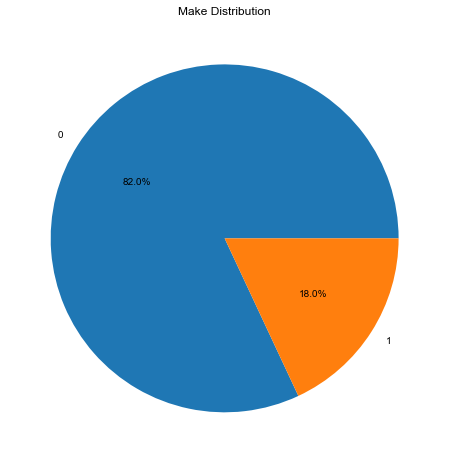

In [ ]:
#Market share of Ford cars
plt.figure(figsize=(12, 8))
df['Make_Ford'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Make Distribution')
plt.ylabel('')
plt.show()

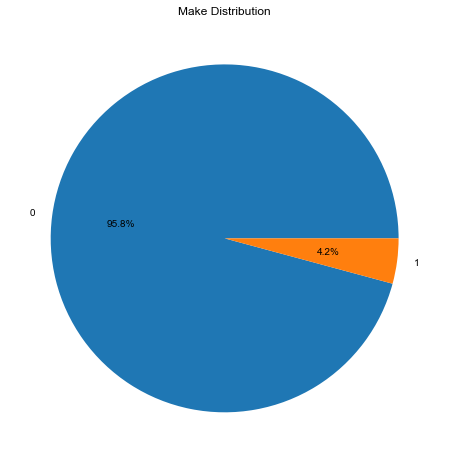

In [ ]:
#Market share of BMW cars
plt.figure(figsize=(12, 8))
df['Make_BMW'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Make Distribution')
plt.ylabel('')
plt.show()

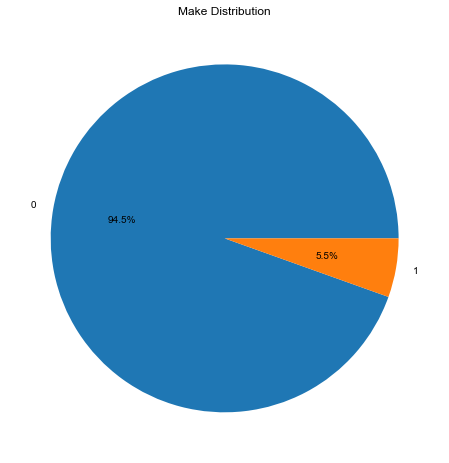

In [ ]:
#Market share of Toyota cars
plt.figure(figsize=(12, 8))
df['Make_Toyota'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Make Distribution')
plt.ylabel('')
plt.show()

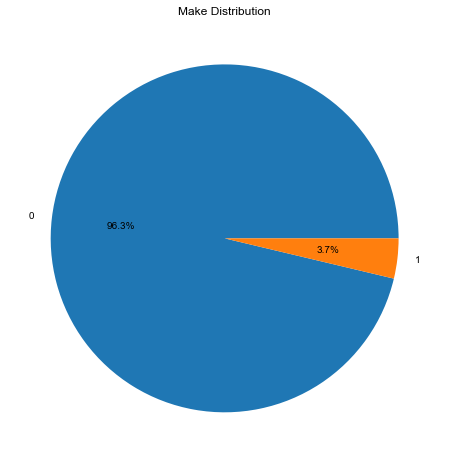

In [ ]:
#Market share of Jeep cars
plt.figure(figsize=(12, 8))
df['Make_Jeep'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Make Distribution')
plt.ylabel('')
plt.show()

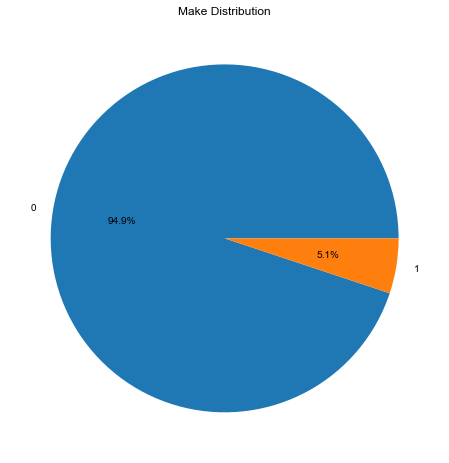

In [ ]:
#Market share of Mercedes-Benz cars
plt.figure(figsize=(12, 8))
df['Make_Mercedes-Benz'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Make Distribution')
plt.ylabel('')
plt.show()

In [ ]:
import pandas as pd

# Dataframe is named df and contains the necessary columns: 'pricesold' and 'Mileage'

# Calculate price per mile
df['Price_per_Mile'] = df['pricesold'] / df['Mileage']

# Calculate price depreciation rate
# 'yearsold' column contains the year the car was sold
current_year = pd.Timestamp.now().year
df['Years_since_sold'] = current_year - df['yearsold']
df['Price_Depreciation_Rate'] = (df['pricesold'] - df['pricesold'].min()) / df['Years_since_sold']

# Display the first few rows of the updated dataframe
print(df.head())

       ID  pricesold  yearsold  Mileage           Trim  Engine     BodyType  \
0  137178       7500      2020    84430             LX   13153        Sedan   
1   96705      15000      2019        0            NaN    9266  Convertible   
2  119660       8750      2020    55000  2+2 Cabriolet   10356  Convertible   
3   80773      11600      2019    97200          Stock    4886        Coupe   
4   64287      44000      2019    40703     Turbo X-50    6808        Coupe   

   NumCylinders DriveType  Make_BMW  ...  Year_2005  Year_2006  Year_2007  \
0             0       RWD         0  ...          0          0          0   
1             8       RWD         0  ...          0          0          0   
2             6       RWD         0  ...          0          0          0   
3             8       RWD         0  ...          0          0          0   
4             6       AWD         0  ...          0          0          0   

   Year_2008  Year_2011  Year_2013  Year_Other  Price_per_Mile